In [74]:
import numpy as np
import math
from ase.io import read, write
from ase.geometry import get_dihedrals
# from ase.geometry import set_dihedral
from ase import Atom
from ase import atoms



molecule = read('butane.gro', format='gromacs')
current_dihedral_angle = molecule.get_dihedral(3, 2, 1, 0, mic=False)
    
numberAtoms = 14
for i in range(numberAtoms):
    print(molecule[i])

angle = np.linspace(0,180,181)

def rotation_YZ(ANGLE,y,z):
    new_z = y*math.cos(math.radians(ANGLE)) - z*math.sin(math.radians(ANGLE))
    new_y = y*math.sin(math.radians(ANGLE)) + z*math.cos(math.radians(ANGLE))

    return new_y, new_z
    
bx = 50
by = bz = 50

x = molecule.get_positions()[:,0]
y = molecule.get_positions()[0:7,1]
z = molecule.get_positions()[0:7,2]


Y, Z = [], []
for i in range(len(y)):
    Y.append(rotation_YZ(60,y[i],z[i])[0])
    Z.append(rotation_YZ(60,y[i],z[i])[1])

Y = np.array(Y)
Z = np.array(Z)

# Y1 = np.empty(len(x))
# Z1 = np.empty(len(x))

# for i in range(len(y)):    
#     # X[i] = x[i] - bx * round_half_up(x[i] / bx)
#     Y1[i] = (Y[i] - by * np.round(Y[i] / by))
#     Z1[i] = (Z[i] - bz * np.round(Z[i] / bz))




y1 = molecule.get_positions()[7:,1]
z1 = molecule.get_positions()[7:,2]


Positions = np.empty([14,3])
for i in range(3):
    for j in range(len(x)):
        if int(i) == 0:
            Positions[j,i] = x[j]
        elif int(i) == 1:
            if j < 7:
                Positions[j,i] = Y[j]
            else:
                Positions[j,i] = y1[j-7]
        elif int(i) == 2:
            if j < 7:
                Positions[j,i] = Z[j]
            else:
                Positions[j,i] = z1[j-7]

molecule.positions = Positions
write('modified_structure.gro', molecule)




Atom('C', [26.8, 25.0, 24.29], tag=0, index=0)
Atom('C', [25.28, 25.0, 24.29], tag=0, index=1)
Atom('H', [27.18, 25.0, 23.26], tag=1, index=2)
Atom('H', [27.189999999999998, 24.11, 24.79], tag=1, index=3)
Atom('H', [27.189999999999998, 25.89, 24.8], tag=1, index=4)
Atom('H', [24.92, 24.119999999999997, 23.75], tag=1, index=5)
Atom('H', [24.92, 25.880000000000003, 23.75], tag=1, index=6)
Atom('C', [24.72, 25.0, 25.71], tag=0, index=7)
Atom('C', [23.2, 25.0, 25.71], tag=0, index=8)
Atom('H', [25.08, 25.880000000000003, 26.25], tag=1, index=9)
Atom('H', [25.08, 24.119999999999997, 26.25], tag=1, index=10)
Atom('H', [22.810000000000002, 25.89, 25.2], tag=1, index=11)
Atom('H', [22.82, 25.0, 26.74], tag=1, index=12)
Atom('H', [22.810000000000002, 24.11, 25.2], tag=1, index=13)


In [76]:
molecule.edit()

In [77]:
molecule.get_dihedral(3, 2, 1, 0, mic=False)

326.60155146639835

In [29]:
molecule.get_positions()

array([[26.8 , 25.  , 24.29],
       [25.28, 25.  , 24.29],
       [27.18, 25.  , 23.26],
       [27.19, 24.11, 24.79],
       [27.19, 25.89, 24.8 ],
       [24.92, 24.12, 23.75],
       [24.92, 25.88, 23.75],
       [24.72, 25.  , 25.71],
       [23.2 , 25.  , 25.71],
       [25.08, 25.88, 26.25],
       [25.08, 24.12, 26.25],
       [22.81, 25.89, 25.2 ],
       [22.82, 25.  , 26.74],
       [22.81, 24.11, 25.2 ]])

In [46]:
molecule.get_positions()[7:,0]

array([24.72, 23.2 , 25.08, 25.08, 22.81, 22.82, 22.81])

In [48]:
molecule.get_positions()[7:,0][13-7]

22.810000000000002

In [78]:
Positions

array([[26.8       , 33.79563509, -8.53575706],
       [25.28      , 33.79563509, -8.53575706],
       [27.18      , 33.28063509, -7.64375089],
       [27.19      , 33.27487249, -9.41376976],
       [27.19      , 34.8213977 , -8.53243001],
       [24.92      , 32.76353274, -8.50810334],
       [24.92      , 34.28773745, -7.62810334],
       [24.72      , 25.        , 25.71      ],
       [23.2       , 25.        , 25.71      ],
       [25.08      , 25.88      , 26.25      ],
       [25.08      , 24.12      , 26.25      ],
       [22.81      , 25.89      , 25.2       ],
       [22.82      , 25.        , 26.74      ],
       [22.81      , 24.11      , 25.2       ]])

In [2]:
import numpy as np
import math
from ase.io import read, write
from ase.geometry import get_dihedrals
from ase import Atoms

angle = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180]

for i in range(len(angle)):
    molecule = read('butane.gro', format='gromacs')
    atom_indices = [0, 1, 7, 8]
    current_dihedral_angle = molecule.get_dihedral(atom_indices[0], atom_indices[1], atom_indices[2], atom_indices[3], mic=False)
    # print(f"Current dihedral angle: {current_dihedral_angle:.2f} degrees")

    target_dihedral_angle = angle[i] - current_dihedral_angle

    # dihedral_change = +target_dihedral_angle - current_dihedral_angle
    # print(f"Dihedral change needed: {dihedral_change:.2f} degrees")
    molecule.set_dihedral(atom_indices[0], atom_indices[1], atom_indices[2], atom_indices[3], angle=target_dihedral_angle, indices=range(7))


    write('butane-'+str(i)+'.gro', molecule)



In [3]:
for i in range(len(angle)):
    molecule = read('butane-'+str(i)+'.gro', format='gromacs')
    print(molecule.get_dihedral(8, 7, 1, 0, mic=False))

180.0
164.88090947469541
149.82005599925168
134.89030348815493
120.00991988025802
105.20075691863369
89.80832898811963
74.93711227415163
59.98546621038463
44.839680162534904
30.177272044794336
15.117710342569724
0.0


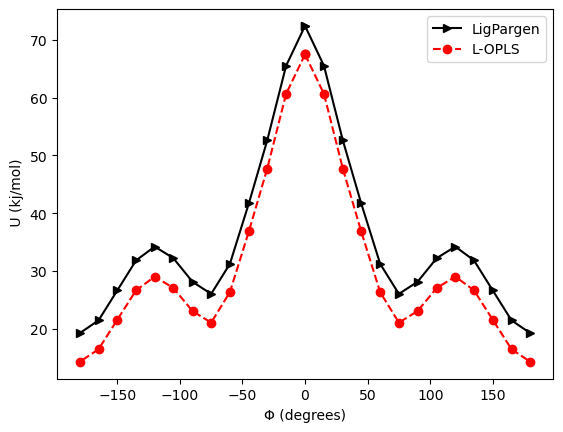

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from lmfit import Model
from sympy import symbols, solve
import openpyxl 
from sklearn.metrics import mean_absolute_error,mean_squared_error
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import optimize
import sympy as sp
import math as m
from matplotlib import pyplot as plt, patches

dihedral,LigPargen, LOPLS = [], [], []
with open('data') as f:
    for line in f:
        p = line.split()

        if len(p) == 3:
            dihedral.append(float(p[0]))
            LigPargen.append(float(p[1]))
            LOPLS.append(float(p[2]))


import matplotlib.pyplot as plt

# Assuming 'dihedral', 'LigPargen', and 'LOPLS' are defined arrays

# Plotting LigPargen with a label
plt.plot(dihedral[0:13], LigPargen[0:13], 'k->', label='LigPargen')
plt.plot(dihedral[13:26], LigPargen[13:26], 'k->')  # Continuation of LigPargen

# Plotting LOPLS with a label
plt.plot(dihedral[0:13], LOPLS[0:13], 'r--o', label='L-OPLS')
plt.plot(dihedral[13:26], LOPLS[13:26], 'r--o')  # Continuation of L-OPLS

# Add legend
plt.legend()

# Axis labels
plt.xlabel('\u03A6 (degrees)')
plt.ylabel(' U (kj/mol)')

# Show plot
plt.show()


In [53]:
import numpy as np
import math
from ase.io import read, write
from ase.geometry import get_dihedrals
from ase import Atoms


numberAtoms = 14
for i in range(numberAtoms):
    print(molecule[i])


angle = np.linspace(180,360,31)


for i in range(len(angle)):
    molecule = read('butane.gro', format='gromacs')
    print("Current Dihedral = " + str(molecule.get_dihedral(0, 1, 2, 3, mic=False)))
    molecule.set_dihedral(0,1,2,3, angle=angle[i], mask=[1,1,0,0,1,1,1,1,1,0,0,0,0,0])
    print("Dihedral after rotation = " + str(molecule.get_dihedral(0, 1, 2, 3, mic=False)))
    write('butane-'+str(i)+'.gro', molecule)
    



Atom('C', [24.169160515021463, 25.0, 23.25248583690987], tag=0, index=0)
Atom('C', [25.28, 25.0, 24.29], tag=0, index=1)
Atom('C', [24.72, 25.0, 25.71], tag=0, index=2)
Atom('C', [23.2, 25.0, 25.71], tag=0, index=3)
Atom('H', [24.59450300429185, 25.0, 22.24036738197425], tag=1, index=4)
Atom('H', [23.542854935622323, 25.89, 23.351689270386263], tag=1, index=5)
Atom('H', [23.53602918454936, 24.11, 23.358997424892703], tag=1, index=6)
Atom('H', [25.911684120171675, 25.880000000000003, 24.14108669527897], tag=1, index=7)
Atom('H', [25.911684120171675, 24.119999999999997, 24.14108669527897], tag=1, index=8)
Atom('H', [25.08, 25.880000000000003, 26.25], tag=1, index=9)
Atom('H', [25.08, 24.119999999999997, 26.25], tag=1, index=10)
Atom('H', [22.810000000000002, 25.89, 25.2], tag=1, index=11)
Atom('H', [22.82, 25.0, 26.74], tag=1, index=12)
Atom('H', [22.810000000000002, 24.11, 25.2], tag=1, index=13)
Current Dihedral = 180.0
Dihedral after rotation = 180.0
Current Dihedral = 180.0
Dihedral 

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from lmfit import Model
from sympy import symbols, solve
import openpyxl 
from sklearn.metrics import mean_absolute_error,mean_squared_error
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import optimize
import sympy as sp
import math as m
from matplotlib import pyplot as plt, patches

import numpy as np
import math
from ase.io import read, write
from ase.geometry import get_dihedrals
from ase import Atoms

molecule = read('BUT.gro', format='gromacs')
forcefield = []
with open ('butane.itp') as f:
    for line in f:
        p = line.split()

        forcefield.append(p)
atomNumber = molecule.get_global_number_of_atoms()


atomtypes, moleculetype, bonds, angles, dihedrals, pairs = [], [], [], [], [], []


for i in range(len(forcefield)):
    if len(forcefield[i]) == 3 and forcefield[i][1] == 'atomtypes':
        for j in range(i+1,i+atomNumber+1):
            # print(i)
            atomtypes.append(forcefield[j])
        print('==================')        
    if len((forcefield[i])) == 3 and forcefield[i][1] == 'moleculetype':
        for k in range(i+5,i+5+atomNumber):
            moleculetype.append(forcefield[k])
        print('============')

    if len((forcefield[i])) == 3 and forcefield[i][1] == 'bonds':
        for s in range(i+1,i+atomNumber):
            bonds.append(forcefield[s])
        print('============')

    if len((forcefield[i])) == 3 and forcefield[i][1] == 'angles':
        for s in range(i+2,i+2*atomNumber-2):
            angles.append(forcefield[s])
        print('============')

    if len((forcefield[i])) == 4 and forcefield[i][1] == 'PROPER':
        for s in range(i+2,i+2*atomNumber+1):
            dihedrals.append(forcefield[s])
        print('============')

    if len((forcefield[i])) == 3 and forcefield[i][1] == 'pairs':
        for s in range(i+1,i+2*atomNumber):
            pairs.append(forcefield[s])
        print('============')


In [269]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from lmfit import Model
from sympy import symbols, solve
import openpyxl 
from sklearn.metrics import mean_absolute_error,mean_squared_error
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import optimize
import sympy as sp
import math as m
from matplotlib import pyplot as plt, patches


def RB(psy, A0, A1, A2, A3, A4, A5):
    ANG = psy - 180
    RB = A0 + A1 * np.cos(np.deg2rad(ANG)) + A2 * (np.cos(np.deg2rad(ANG)))**2 + A3 * (np.cos(np.deg2rad(ANG)))**3 + A4 * (np.cos(np.deg2rad(ANG)))**4 + A5 * (np.cos(np.deg2rad(ANG)))**5
    return RB

angle = np.linspace(0,180,12)
energy_LJ, energy_RB, energy_bonds,energy_angle = [], [], [], []
for j in range(len(angle)):
    
    molecule = read('BUT.gro', format='gromacs')
    # molecule.set_pbc([False, False, False])  # Enable PBC in all directions (x, y, z)
    # molecule.wrap()
    bx = by = bz = molecule.get_cell()[0][0] * 0.1
    molecule.set_dihedral(3,2,1,0, angle=angle[j], mask=[1,1,0,0,1,1,1,1,1,0,0,0,0,0]) #mask=[1,1,0,0,1,1,1,1,1,0,0,0,0,0]
    write('butane-'+str(j)+'.gro', molecule)
    rb = 0
    for i in range(len(dihedrals)):
        phi = molecule.get_dihedral(int(dihedrals[i][0])-1, int(dihedrals[i][1])-1, int(dihedrals[i][2])-1, int(dihedrals[i][3])-1, mic=False)
        c0, c1, c2, c3 = float(dihedrals[i][5]), float(dihedrals[i][6]), float(dihedrals[i][7]), float(dihedrals[i][8])
        c4, c5 = 0, 0
        rb = rb + RB(phi,c0,c1,c2,c3,c4,c5)
    # print(rb)
    energy_RB.append(rb)

    U_b = 0
    for ii in range(len(bonds)):
        U_b = U_b + 0.5*float(bonds[ii][4])*(float(bonds[ii][3])-0.1*molecule.get_distance(int(bonds[ii][0])-1,int(bonds[ii][1])-1))**2
    
    energy_bonds.append(U_b)


    U_ang = 0
    for ik in range(len(angles)):
        U_ang = U_ang + 0.5*float(angles[ik][5])*(np.deg2rad(float(angles[ik][4])-molecule.get_angle(int(angles[ik][0])-1,int(angles[ik][1])-1, int(angles[ik][2])-1)))**2
    energy_angle.append(U_ang)



    epsilon, sigma = [], []
    for sd in range(len(moleculetype)):
        for sf in range(len(atomtypes)):
            if atomtypes[sf][0] == moleculetype[sd][1]:
            
                epsilon.append(float(atomtypes[sf][6]))
                sigma.append(float(atomtypes[sf][5]))

    
    molecule.set_pbc([True, True, True])  # Enable PBC in all directions (x, y, z)
    molecule.wrap()
    bx = by = bz = molecule.get_cell()[0][0] * 0.1

    x = molecule.get_positions()[:,0] * 0.1 # all nm
    y = molecule.get_positions()[:,1] * 0.1
    z = molecule.get_positions()[:,2] * 0.1 

    rc2 = 1**2 # nm^2
    numberPairs_14 = atomNumber*(atomNumber+1)/2 # all possible combinations


    en = 0
    count = 0
    for i in range(len(pairs)):
    
    
        dx = x[int(pairs[i][0])-1] - x[int(pairs[i][1])-1]
        dy = y[int(pairs[i][0])-1] - y[int(pairs[i][1])-1]
        dz = z[int(pairs[i][0])-1] - z[int(pairs[i][1])-1]
    
    
        DX = dx - bx * np.round(dx/bx)
        DY = dy - by * np.round(dy/by)
        DZ = dz - bz * np.round(dz/bz)

            
        r2 = DX**2 + DY**2 + DZ**2
    
    
        if r2 < rc2:
            count += 1
            epsilon_ij = np.sqrt(epsilon[int(pairs[i][0])-1] * epsilon[int(pairs[i][1])-1])
            sigma_ij = 0.5 * ( sigma[int(pairs[i][0])-1] + sigma[int(pairs[i][1])-1])                
            C6 = (sigma_ij**2/r2)**3            
            C12 = C6**2
            lj_rc = 4 * epsilon_ij * ((sigma_ij**2/rc2)**6 - (sigma_ij**2/rc2)**3)
            LJ = 4 * epsilon_ij * (C12 - C6)
            LJ -= lj_rc * C6
                
            en += LJ
                
            
    energy_LJ.append(en/2)







(0.0, 30.0)

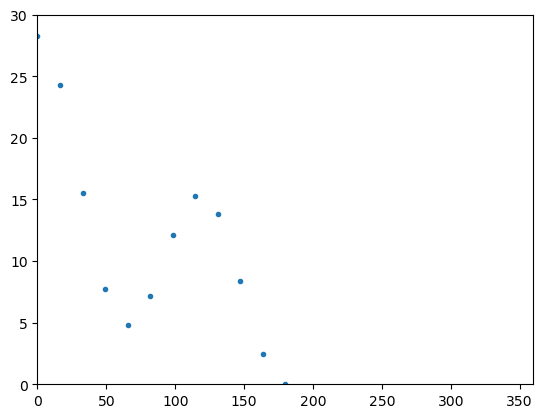

In [270]:
potential = []
for i in range(len(energy_angle)):
    potential.append(energy_angle[i] + energy_bonds[i] + energy_LJ[i] + energy_RB[i])

pot = []
for i in range(len(potential)):
    pot.append(potential[i] - np.min(potential))
plt.plot(angle,pot,'.')
plt.xlim([0,360])
plt.ylim([0,30])

In [257]:
charges = []
for i in range(len(moleculetype)):
    charges.append
    (float(moleculetype[i][6]))
  

In [255]:
for j in range(len(pairs)):
    pairs[j]

['1', '4', '1']
['3', '5', '1']
['3', '6', '1']
['3', '7', '1']
['1', '10', '1']
['4', '8', '1']
['1', '11', '1']
['5', '8', '1']
['4', '9', '1']
['6', '8', '1']
['5', '9', '1']
['2', '12', '1']
['7', '8', '1']
['6', '9', '1']
['2', '13', '1']
['7', '9', '1']
['2', '14', '1']
['8', '10', '1']
['9', '10', '1']
['8', '11', '1']
['9', '11', '1']
['10', '12', '1']
['11', '12', '1']
['10', '13', '1']
['11', '13', '1']
['10', '14', '1']
['11', '14', '1']


In [258]:
for i in range(len(pairs)):
    
    
        dx = x[int(pairs[i][0])-1] - x[int(pairs[i][1])-1]
        dy = y[int(pairs[i][0])-1] - y[int(pairs[i][1])-1]
        dz = z[int(pairs[i][0])-1] - z[int(pairs[i][1])-1]
         
    
        DX = dx - bx * np.round(dx/bx)
        DY = dy - by * np.round(dy/by)
        DZ = dz - bz * np.round(dz/bz)

            
        r = np.sqrt(DX**2 + DY**2 + DZ**2)

        qij = charges[int(pairs[i][0])-1] * [int(pairs[i][1])-1]

        f = 138.935458 # 1/(4*pi()*epsilon0)
        

[-0.2391,
 -0.1788,
 -0.1787,
 -0.2391,
 0.0805,
 0.0805,
 0.0805,
 0.0882,
 0.0882,
 0.0882,
 0.0882,
 0.0805,
 0.0805,
 0.0805]

In [260]:
energy_LJ

[14.478093260608317,
 14.470103936805568,
 14.446169565792456,
 14.406390686016758,
 14.350933989113619,
 14.280031022899816,
 14.193976398663835,
 14.093125525342062,
 13.977891898910922,
 13.848743980553465,
 13.706201701792383,
 13.55083263873895,
 13.38324790084089,
 13.204097781974243,
 13.014067223395736,
 12.813871138946062,
 12.604249652983587,
 12.385963300856814,
 12.159788240336947,
 11.92651152038362,
 11.686926450973377,
 11.441828114550836,
 11.192009056061892,
 10.938255184565605,
 10.681341915196878,
 10.422030575846787,
 10.161065098431108,
 9.89916901010995,
 9.637042735372798,
 9.375361215599025,
 9.114771848584654,
 8.855892746661791,
 8.599311308461198,
 8.345583096120759,
 8.095231006848579,
 7.8487447252194995,
 7.606580440436818,
 7.369160811017653,
 7.136875157960825,
 6.9100798664157415,
 6.689098975168911,
 6.47422493288852,
 6.265719499978954,
 6.0638147750818705,
 5.868714325677608,
 5.680594402870254,
 5.499605221243444,
 5.325872285628829,
 5.159497747700

In [272]:
for i in range(len(angle)):
    print(angle[i])

0.0
16.363636363636363
32.72727272727273
49.09090909090909
65.45454545454545
81.81818181818181
98.18181818181819
114.54545454545455
130.9090909090909
147.27272727272728
163.63636363636363
180.0
